In [25]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}<style>"))

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2
import random

In [4]:
val_masks = np.load('/home/mc16/result/val_masks_06-12-00:43:14.npy')
print(val_masks[0].shape)

(224, 224)


1790


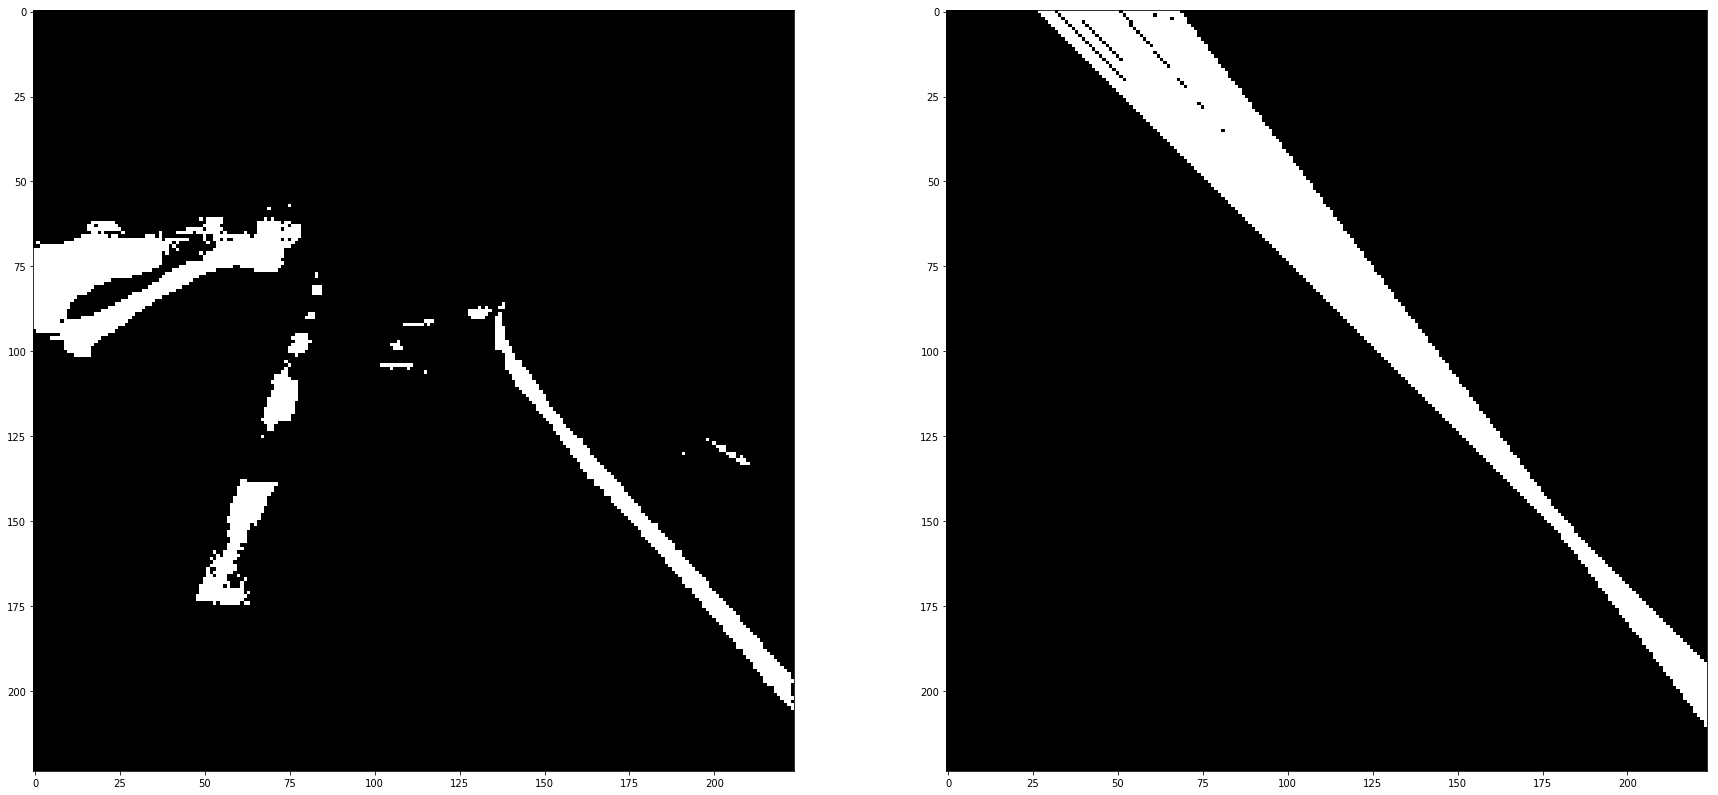

In [40]:
test_index = random.randint(0, len(val_masks))
print(test_index)
test_mask = val_masks[test_index]
edges = cv2.Canny(test_mask, 50,200)
lines = cv2.HoughLines(test_mask, 2, np.pi/180, 160)
# print(lines[0])

def draw_hough(lines):
    pic = np.zeros((224,224), dtype=np.uint8)
    if(len(lines) == 0):
        return pic
    for rho,theta in lines[0]:
        a=np.cos(theta)
        b=np.sin(theta)
        x0=a*rho
        y0=b*rho
        x1=int(x0+1000*(-b))
        y1=int(y0+1000*(a))
        x2=int(x0-1000*(-b))
        y2=int(y0-1000*(a))
        cv2.line(pic,(x1,y1),(x2,y2),255,2)
    return pic
hough_img = draw_hough(lines)

fig, axs = plt.subplots(1, 2, figsize=(30,30)) 
axs[0].imshow(test_mask,cmap='gray')
axs[1].imshow(hough_img,cmap='gray')
# axs[2].imshow(test_points,cmap='gray')
plt.show()